<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

##### Import Necessary Modules:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [5]:
# Define the URL of the dataset
# file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv('survey_data.csv')

# Display the first few rows to ensure it loaded correctly
# print(df.head())


### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [7]:
## Write your code here
df.describe(include='all')

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
count,65437.000000,65437,65437,65437,54806,65437,54466,60784,60488,49237,...,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,56182,56238,2.343500e+04,29126.000000
unique,NaN,5,8,110,3,1,118,8,418,10853,...,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN
top,NaN,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
freq,NaN,50207,23911,39041,23015,65437,9993,24942,3674,603,...,NaN,NaN,NaN,NaN,NaN,NaN,38767,30071,NaN,NaN
mean,32719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,NaN,NaN,8.615529e+04,6.935041
std,18890.179119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,NaN,NaN,1.867570e+05,2.088259
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000e+00,0.000000
25%,16360.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,3.271200e+04,6.000000
50%,32719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,NaN,NaN,6.500000e+04,7.000000
75%,49078.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,NaN,NaN,1.079715e+05,8.000000


### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [12]:
## Write your code here
missing_values = df.isnull()
missing_values.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,True,True
3,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,True,True,False,False,True,True
4,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,True,True,False,False,True,True


##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



In [15]:
## Write your code here

# Set plot size and style
# plt.figure(figsize=(8, 4))
# sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=True)

# # Add title and show plot
# plt.title('Missing Values Heatmap')
# plt.show()

##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [26]:
## Write your code here
missing_values_Employment = df['Employment'].isnull().sum()
missing_values_Employment

0

### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [24]:
## Write your code here
most_frequent = df['Employment'].mode()[0]
most_frequent

'Employed, full-time'

##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [28]:
## Write your code here

df['Employment'].fillna(most_frequent, inplace=True)

C:\Users\serge\AppData\Local\Temp\ipykernel_6560\2945444154.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment'].fillna(most_frequent, inplace=True)


### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


C:\Users\serge\AppData\Local\Temp\ipykernel_6560\4273684044.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Employment', palette='pastel')


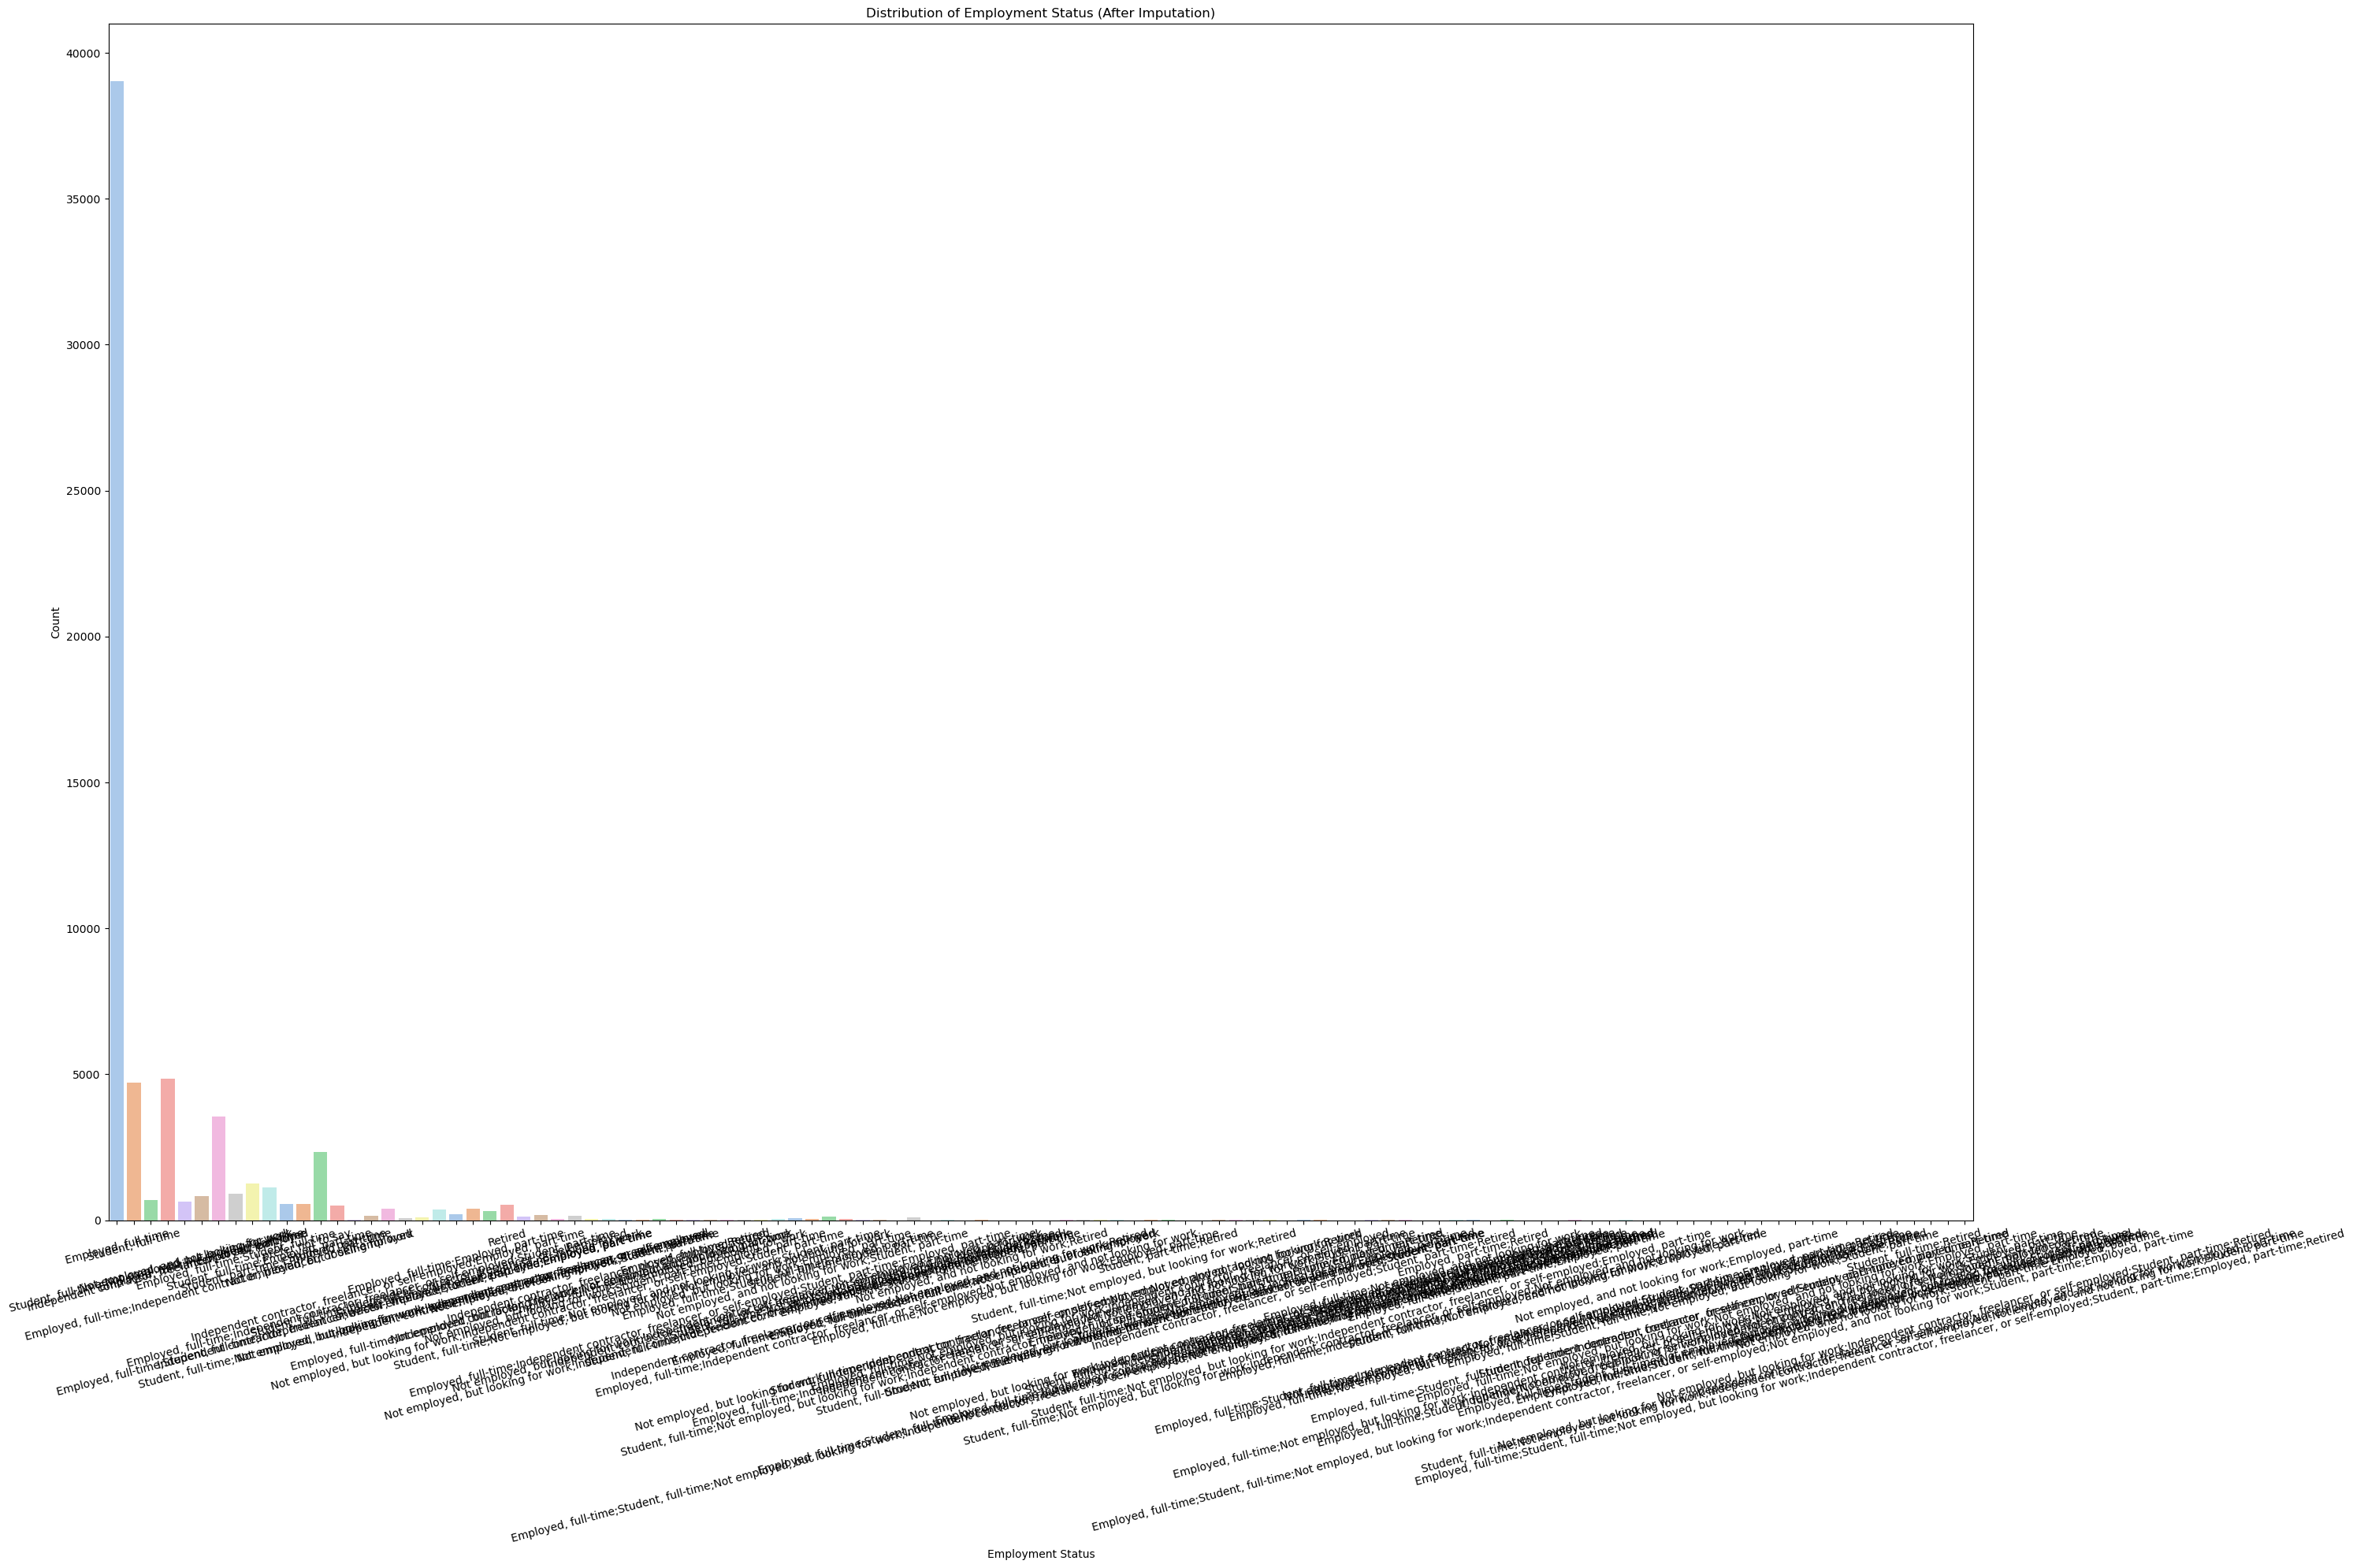

In [36]:
## Write your code here

plt.figure(figsize=(30, 20))
sns.countplot(data=df, x='Employment', palette='pastel')

# Add labels and title
plt.title('Distribution of Employment Status (After Imputation)')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
